# Import packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
%matplotlib inline
from matplotlib import rcParams
rcParams["axes.formatter.useoffset"] = False
rcParams['axes.formatter.limits'] = -15,15
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['xtick.direction']='in'
rcParams['ytick.direction']='in'
#import sys
#sys.path.pop(0)

# Lets import our package 

In [2]:
import rmfit
rmfit

/Users/gks/opt/anaconda3/envs/py39/lib/python3.9/site-packages/autograd/numpy/numpy_wrapper.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  int_types = {_np.int, _np.int8, _np.int16, _np.int32, _np.int64, _np.integer}


<module 'rmfit' from '/Users/gks/Dropbox/mypylib/notebooks/GIT/rmfit/__init__.py'>

# Lets test it on a dataset with an RV variation + RM effect 

In [3]:
# Data from:
# Winn et al. 2009: https://ui.adsabs.harvard.edu/abs/2009ApJ...700..302W/abstract
# Keck HIRES
df = pd.read_csv('../data/example/02_xo3/winn2009_xo3.txt',comment='#')
df

,bjd,rv,e_rv
0,2.454865e+06,295.28,8.47
1,2.454865e+06,283.24,9.22
2,2.454865e+06,236.89,8.63
3,2.454865e+06,221.36,8.68
4,2.454865e+06,228.46,8.29
5,2.454865e+06,193.07,8.10
6,2.454865e+06,182.65,8.45
7,2.454865e+06,151.37,8.58
8,2.454865e+06,133.62,8.85
9,2.454865e+06,103.70,9.28


Text(0, 0.5, 'RV [m/s]')

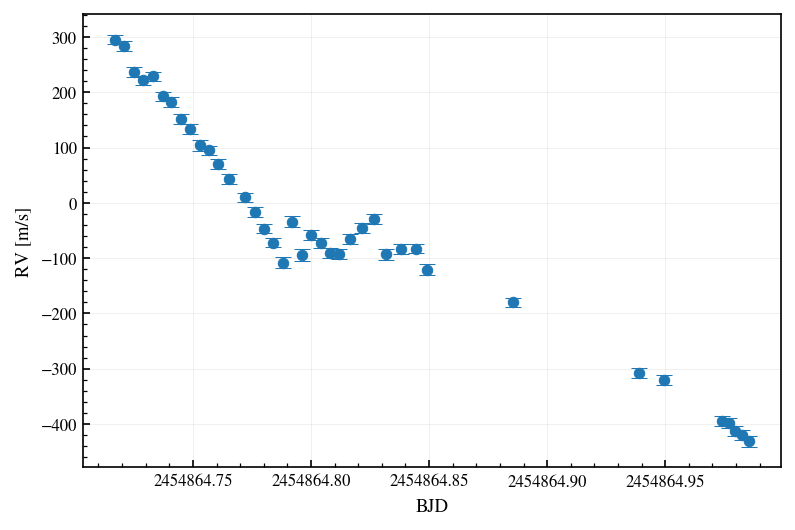

In [4]:
fig, ax = plt.subplots(dpi=150)
ax.errorbar(df.bjd.values,df.rv,df.e_rv,marker='o',lw=0,mew=0.5,capsize=4)
rmfit.utils.ax_apply_settings(ax,ticksize=8)
ax.set_xlabel('BJD')
ax.set_ylabel('RV [m/s]')

### Read priors from file 

In [8]:
f = '../data/example/02_xo3/xo3_priors.dat'
L = rmfit.rmfit.LPFunction(df.bjd.values,df.rv.values,df.e_rv.values,f)
TF = rmfit.rmfit.RMFit(L)

Reading in priorfile from ../data/example/02_xo3/xo3_priors.dat
   prior          arg1        arg2        label  description priortype  fixed
0     NP  2.454450e+06    0.000230        t0_p1        t0_p1     model  False
1     NP  3.191524e+00    0.000007         P_p1         P_p1     model  False
2     UP -1.800000e+02  180.000000       lam_p1       lam_p1     model  False
3     UP  0.000000e+00   30.000000        vsini        vsini     model  False
4     NP  8.420000e+01    0.540000       inc_p1       inc_p1     model  False
5     NP  9.057000e-02    0.000570         p_p1         p_p1     model  False
6     NP  7.070000e+00    0.310000         a_p1         a_p1     model  False
7     NP  3.200000e-01    0.050000           u1           u1     model  False
8     NP  3.600000e-01    0.050000           u2           u2     model  False
9     NP  2.884000e-01    0.003500       ecc_p1       ecc_p1     model  False
10    NP  3.460000e+02    1.300000     omega_p1     omega_p1     model  False


In [9]:
TF.minimize_PyDE(mcmc=False)

Running PyDE Optimizer
Optimized using PyDE
Final parameters:
      labels       centers         lower         upper            pv   center_dist
0      t0_p1  2.454450e+06  2.454450e+06  2.454450e+06  2.454450e+06  2.369750e-06
1       P_p1  3.191524e+00  3.191490e+00  3.191558e+00  3.191524e+00  1.114351e-07
2     lam_p1  0.000000e+00 -1.800000e+02  1.800000e+02  3.275214e+01 -3.275214e+01
3      vsini  1.500000e+01  0.000000e+00  3.000000e+01  1.665228e+01 -1.652280e+00
4     inc_p1  8.420000e+01  8.150000e+01  8.690000e+01  8.420100e+01 -9.965643e-04
5       p_p1  9.057000e-02  8.772000e-02  9.342000e-02  9.053862e-02  3.137820e-05
6       a_p1  7.070000e+00  5.520000e+00  8.620000e+00  7.095306e+00 -2.530644e-02
7         u1  3.200000e-01  7.000000e-02  5.700000e-01  3.220124e-01 -2.012447e-03
8         u2  3.600000e-01  1.100000e-01  6.100000e-01  3.664456e-01 -6.445566e-03
9     ecc_p1  2.884000e-01  2.709000e-01  3.059000e-01  2.889812e-01 -5.811821e-04
10  omega_p1  3.460000e+0

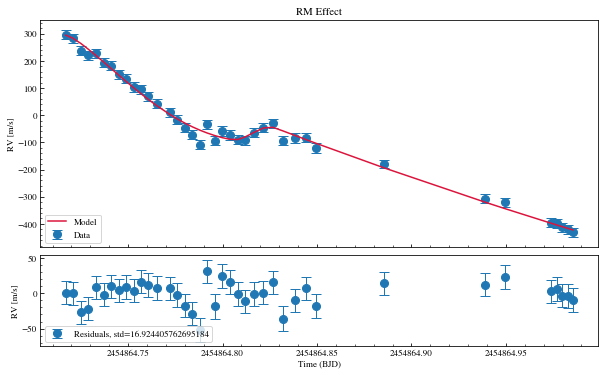

In [10]:
# plot best-fit
TF.plot_fit(TF.min_pv)

In [11]:
L = rmfit.rmfit.LPFunction(df.bjd.values,df.rv.values,df.e_rv.values,f)
TF = rmfit.rmfit.RMFit(L)
TF.minimize_PyDE(mcmc=True,mc_iter=1000)

Reading in priorfile from ../data/example/02_xo3/xo3_priors.dat
   prior          arg1        arg2        label  description priortype  fixed
0     NP  2.454450e+06    0.000230        t0_p1        t0_p1     model  False
1     NP  3.191524e+00    0.000007         P_p1         P_p1     model  False
2     UP -1.800000e+02  180.000000       lam_p1       lam_p1     model  False
3     UP  0.000000e+00   30.000000        vsini        vsini     model  False
4     NP  8.420000e+01    0.540000       inc_p1       inc_p1     model  False
5     NP  9.057000e-02    0.000570         p_p1         p_p1     model  False
6     NP  7.070000e+00    0.310000         a_p1         a_p1     model  False
7     NP  3.200000e-01    0.050000           u1           u1     model  False
8     NP  3.600000e-01    0.050000           u2           u2     model  False
9     NP  2.884000e-01    0.003500       ecc_p1       ecc_p1     model  False
10    NP  3.460000e+02    1.300000     omega_p1     omega_p1     model  False


No flatchain passed, defaulting to using full chains
Plotting curve with best-fit mcmc values


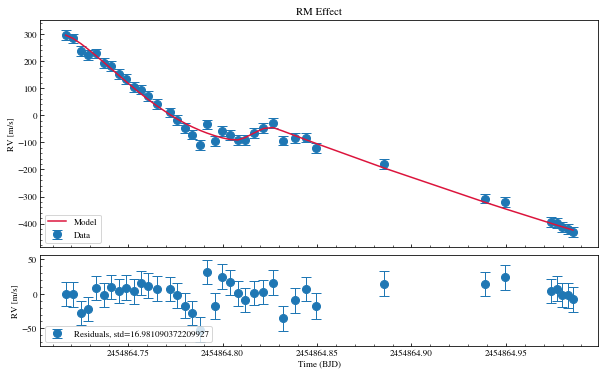

In [12]:
# Plot the MCMC fit
TF.plot_mcmc_fit()

In [13]:
# The min values are recorded in the following attribute
TF.min_pv_mcmc

array([ 2.45444987e+06,  3.19152400e+00,  3.29607855e+01,  1.66034623e+01,
        8.42404298e+01,  9.06150486e-02,  7.10090621e+00,  3.27313434e-01,
        3.62509353e-01,  2.88153247e-01,  3.45286886e+02,  6.24469398e+00,
        1.48456022e+03, -2.91531919e+02,  1.53866826e+01])

## Plot chains 

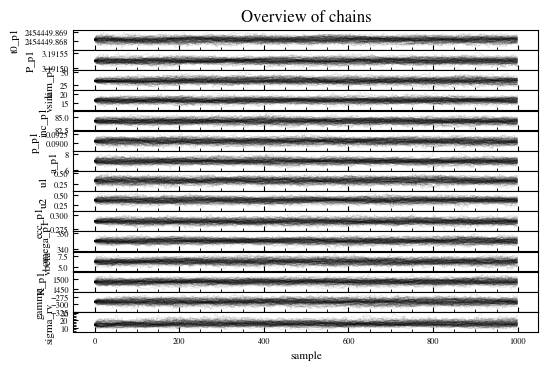

In [14]:
rmfit.mcmc_help.plot_chains(TF.sampler.chain,labels=TF.lpf.ps_vary.labels)

## Plot corner

In [15]:
# Make flatchain and posteriors
burnin_index = 200
chains_after_burnin = TF.sampler.chain[:,burnin_index:,:]
flatchain = chains_after_burnin.reshape((-1,len(TF.lpf.ps_vary.priors)))
df_post = pd.DataFrame(flatchain,columns=TF.lpf.ps_vary.labels)
df_post

,t0_p1,P_p1,lam_p1,vsini,inc_p1,p_p1,a_p1,u1,u2,ecc_p1,omega_p1,vbeta,K_p1,gamma,sigma_rv
0,2.454450e+06,3.191527,33.554651,15.858448,84.561441,0.091845,7.450291,0.331341,0.442924,0.285435,346.833928,5.935286,1482.017720,-290.620450,13.282013
1,2.454450e+06,3.191527,33.554651,15.858448,84.561441,0.091845,7.450291,0.331341,0.442924,0.285435,346.833928,5.935286,1482.017720,-290.620450,13.282013
2,2.454450e+06,3.191527,33.554651,15.858448,84.561441,0.091845,7.450291,0.331341,0.442924,0.285435,346.833928,5.935286,1482.017720,-290.620450,13.282013
3,2.454450e+06,3.191527,33.554651,15.858448,84.561441,0.091845,7.450291,0.331341,0.442924,0.285435,346.833928,5.935286,1482.017720,-290.620450,13.282013
4,2.454450e+06,3.191527,33.554651,15.858448,84.561441,0.091845,7.450291,0.331341,0.442924,0.285435,346.833928,5.935286,1482.017720,-290.620450,13.282013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,2.454450e+06,3.191522,35.420904,16.396665,83.740535,0.090351,6.922213,0.269612,0.376555,0.286313,346.758591,5.290237,1488.237458,-285.259559,19.361982
79996,2.454450e+06,3.191522,35.420904,16.396665,83.740535,0.090351,6.922213,0.269612,0.376555,0.286313,346.758591,5.290237,1488.237458,-285.259559,19.361982
79997,2.454450e+06,3.191522,35.420904,16.396665,83.740535,0.090351,6.922213,0.269612,0.376555,0.286313,346.758591,5.290237,1488.237458,-285.259559,19.361982
79998,2.454450e+06,3.191521,36.147853,16.912092,83.515812,0.090190,6.866699,0.266507,0.400406,0.285764,347.237611,4.857723,1489.374380,-281.077901,20.991622


In [16]:
# Assess convergence, should be close to 1 (usually within a few percent, if not, then rerun MCMC with more steps)
# This example for example would need a lot more steps, but keeping steps fewer for a quick minimal example
# Usually good to let it run for 10000 - 20000 steps for a 'production run'
rmfit.mcmc_help.gelman_rubin(chains_after_burnin)

array([1.14345104, 1.14081434, 1.16636   , 1.12507205, 1.13044117,
       1.12285099, 1.13948399, 1.16274617, 1.15137827, 1.10417728,
       1.15646293, 1.1472878 , 1.12406715, 1.12652605, 1.11573907])

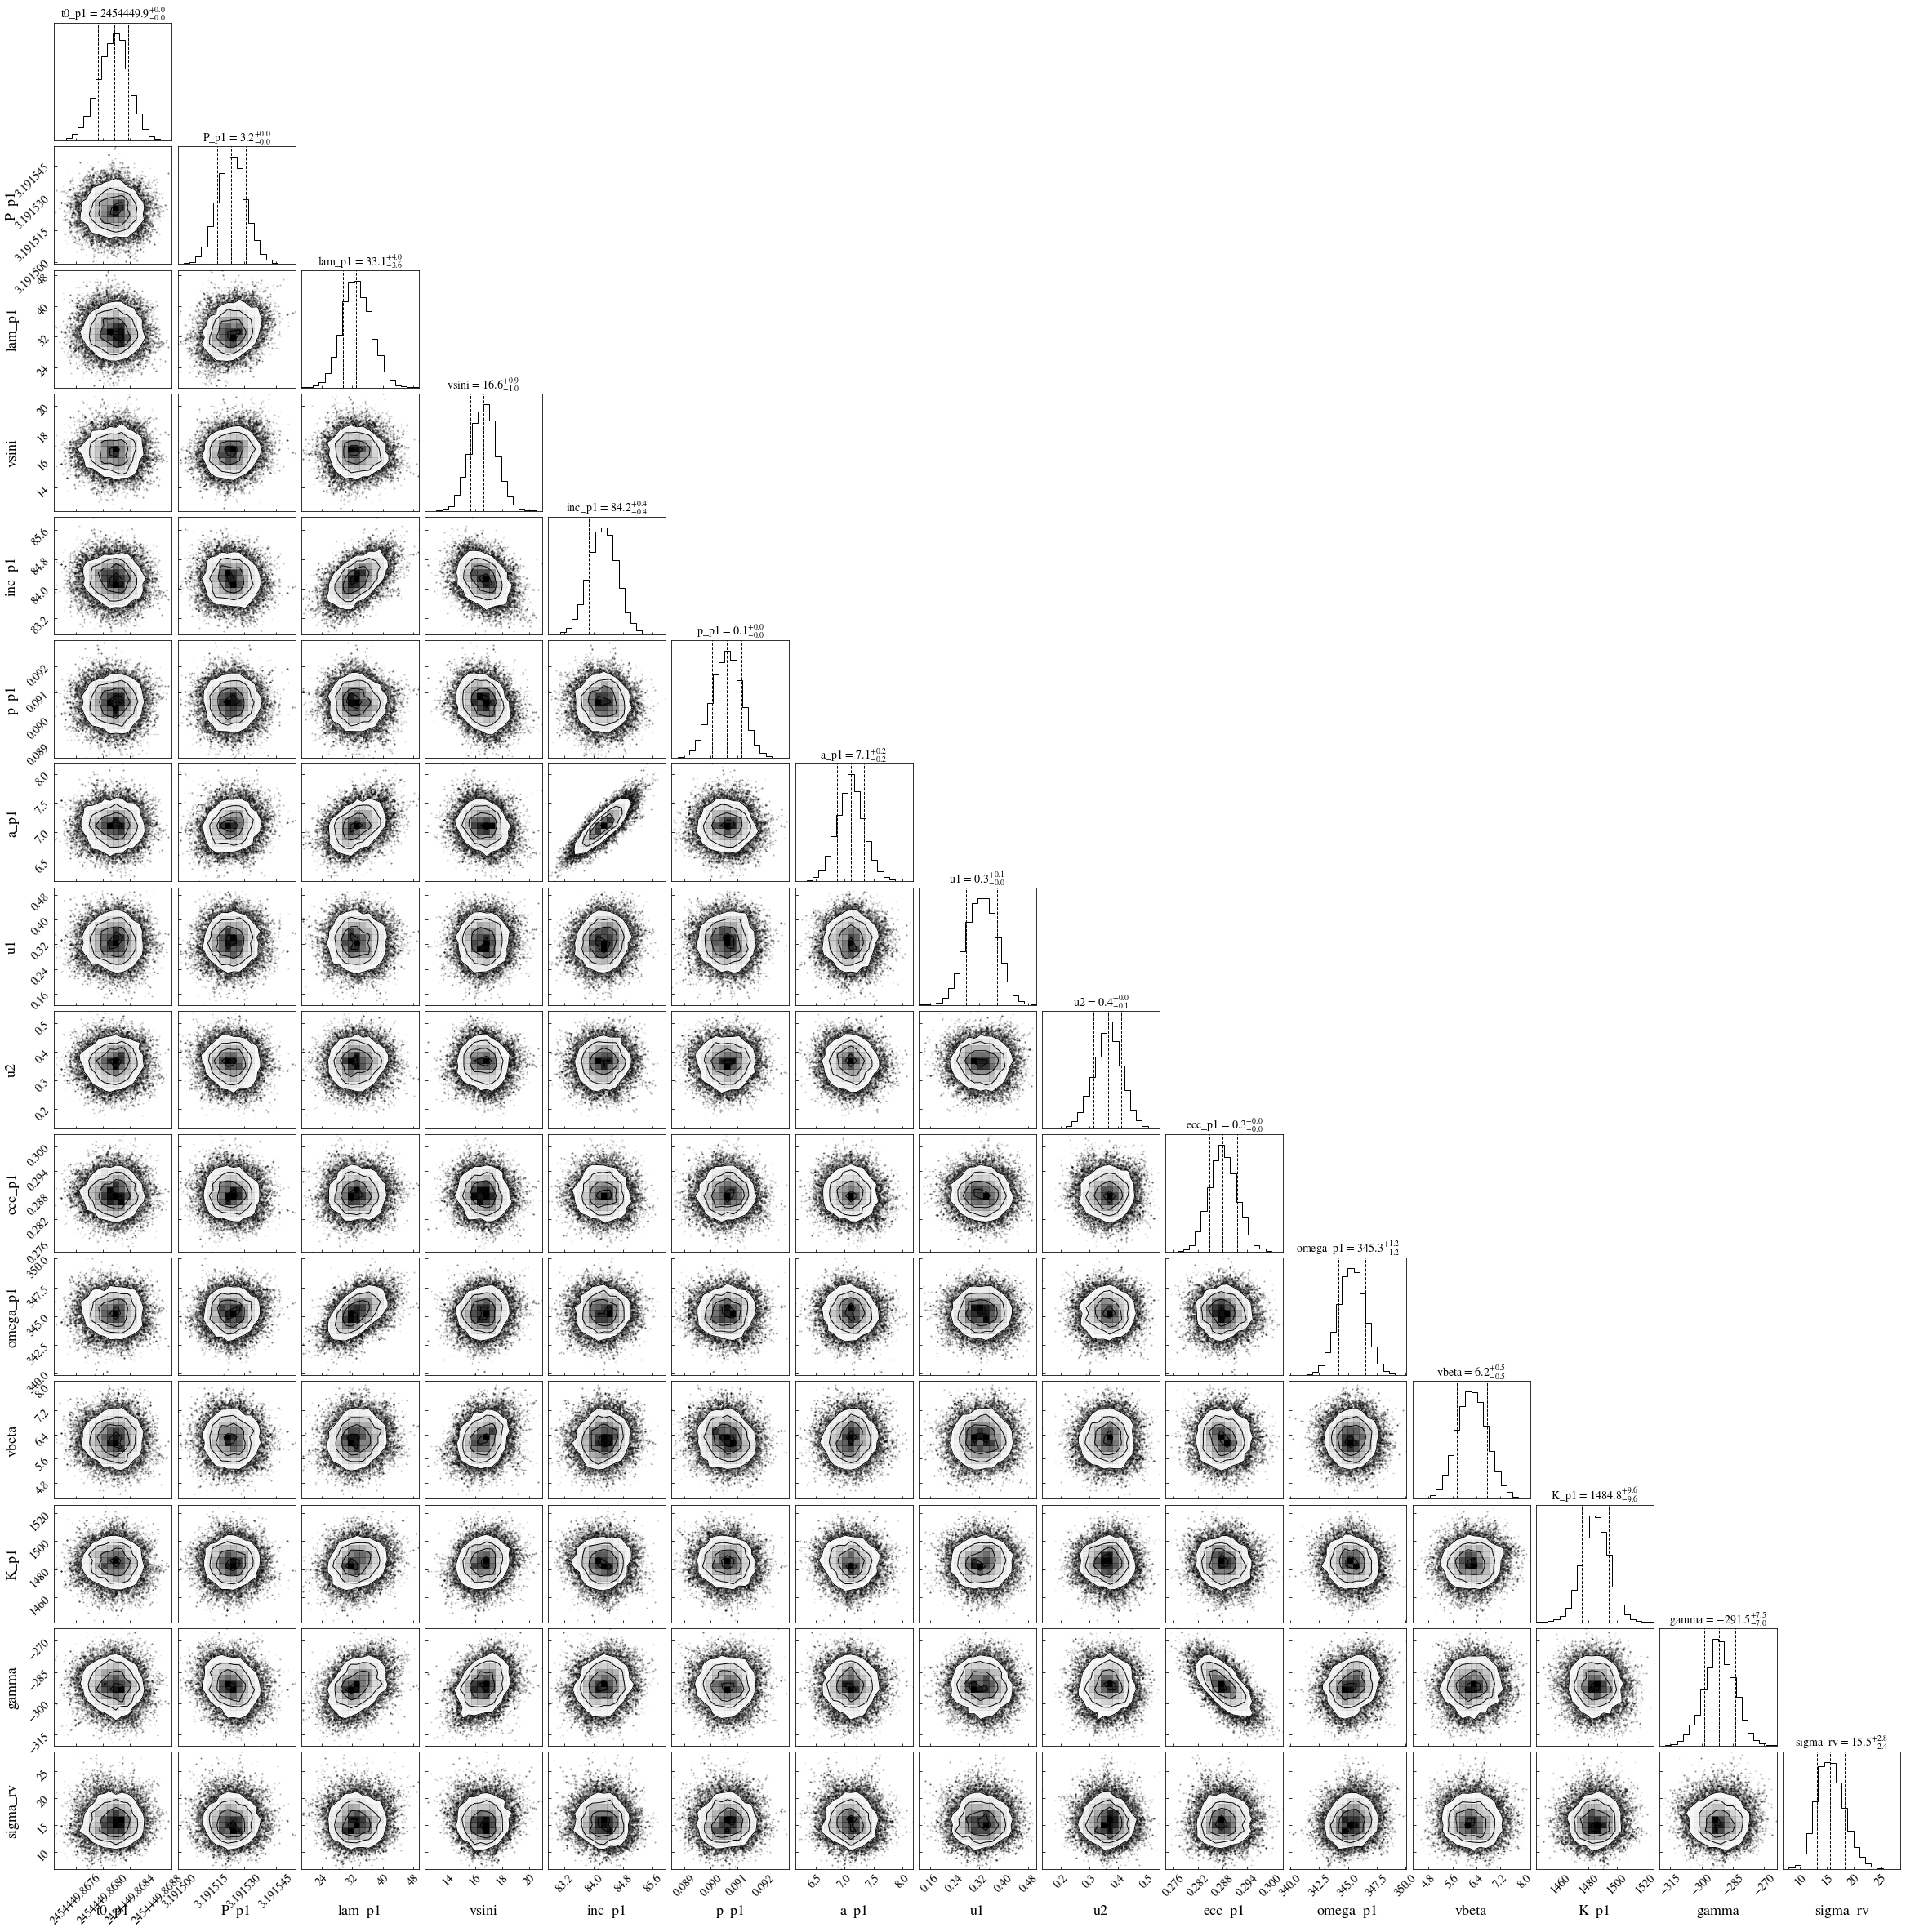

In [17]:
# Plot corner plot
fig = rmfit.mcmc_help.plot_corner(chains_after_burnin,
       show_titles=True,labels=np.array(TF.lpf.ps_vary.descriptions),title_fmt='.1f',xlabcord=(0.5, -0.2))

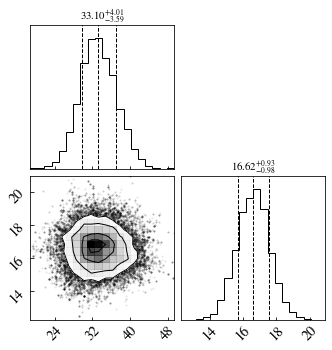

In [18]:
# Narrow down on the lambda and vsini
import corner
fig = corner.corner(df_post[['lam_p1','vsini']],show_titles=True,quantiles=[0.18,0.5,0.84])

In [19]:
# Print median values
df_medvals = TF.get_mean_values_mcmc_posteriors(df_post.values)
df_medvals

,medvals,minus,plus,values,Labels,Description
0,2.454450e+06,0.000238,0.000211,$2454449.86816_{-0.00024}^{+0.00021}$,t0_p1,t0_p1
0,3.191524e+00,0.000007,0.000007,$3.191524_{-0.000006}^{+0.000007}$,P_p1,P_p1
0,3.309998e+01,3.586673,4.008773,$33.1_{-3.6}^{+4.0}$,lam_p1,lam_p1
0,1.662264e+01,0.982503,0.933916,$16.62_{-0.98}^{+0.93}$,vsini,vsini
0,8.424421e+01,0.381737,0.377233,$84.24_{-0.38}^{+0.38}$,inc_p1,inc_p1
0,9.061120e-02,0.000568,0.000545,$0.09061_{-0.00057}^{+0.00054}$,p_p1,p_p1
0,7.105442e+00,0.238223,0.232400,$7.11_{-0.24}^{+0.23}$,a_p1,a_p1
0,3.280208e-01,0.049975,0.050651,$0.328_{-0.050}^{+0.051}$,u1,u1
0,3.636674e-01,0.050159,0.047353,$0.364_{-0.050}^{+0.047}$,u2,u2
0,2.881630e-01,0.003293,0.003538,$0.2882_{-0.0033}^{+0.0035}$,ecc_p1,ecc_p1


# Plotting resulting MCMC fit 

Sampling, i= 0
Sampling, i= 100
Sampling, i= 200
Sampling, i= 300


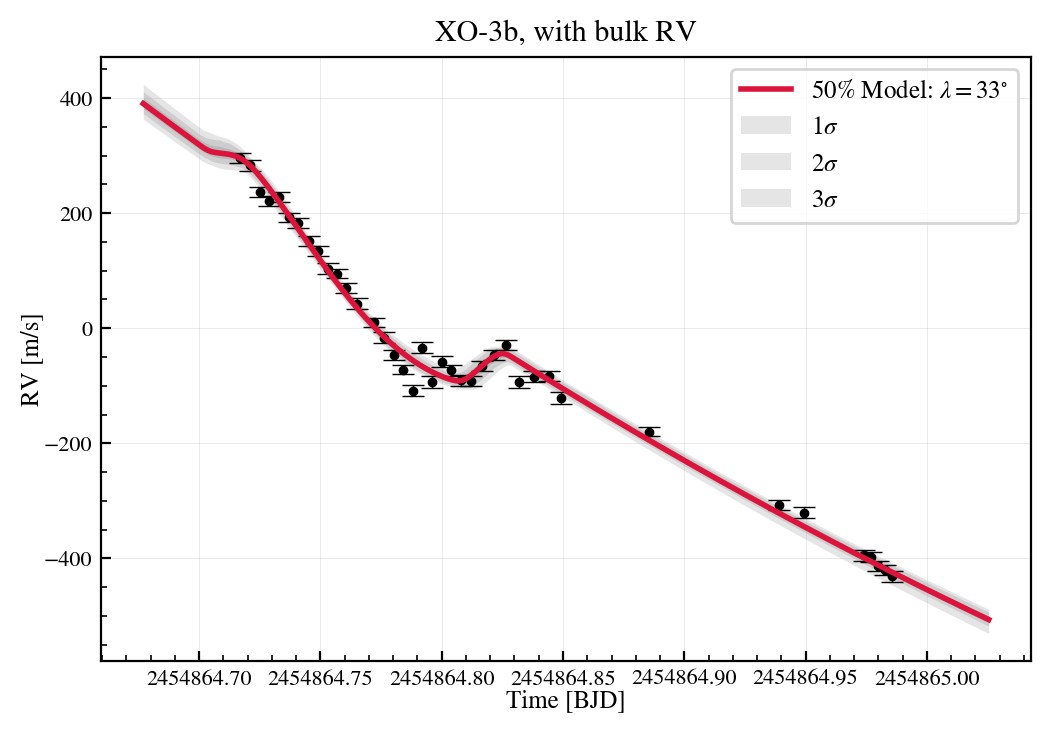

In [20]:
TITLE = 'XO-3b, with bulk RV'
NUMMODELS = 400
shadecolor="black"

###################
times1 = np.linspace(TF.lpf.data['x'][0]-0.02,TF.lpf.data['x'][-1]+0.02,500)
pv_50 = np.percentile(flatchain,[50],axis=0)[0]
t1_mod = np.linspace(times1.min()-0.02,times1.max()+0.02,300)
rv_50 = TF.lpf.compute_total_model(pv_50,t1_mod)

# Plot random samples
fig, ax = plt.subplots(dpi=200)

#################
# Plot data
#################
markercolor="black"
ax.errorbar(TF.lpf.data['x'],TF.lpf.data['y'],TF.lpf.data['error'],
            marker='o',elinewidth=0.5,capsize=4,lw=0,mew=0.5,color=markercolor,markersize=3)
ax.plot(t1_mod,rv_50,color="crimson",
        label=r'50% Model: $\lambda=${:0.0f}'.format(pv_50[2])+'$^{\circ}$',lw=2.,zorder=10)

#################
# Sample models
#################
mmodel1 = []
for i in range(NUMMODELS):
    if i%100 == 0: print("Sampling, i=",i)
    idx = np.random.randint(0, flatchain.shape[0])
    m1 = TF.lpf.compute_total_model(flatchain[idx],times=t1_mod)
    mmodel1.append(m1)
mmodel1 = np.array(mmodel1)
#################

ax.fill_between(t1_mod,np.quantile(mmodel1,0.16,axis=0),np.quantile(mmodel1,0.84,axis=0),
                alpha=0.1,color=shadecolor,lw=0,label='1$\sigma$',zorder=-1)
ax.fill_between(t1_mod,np.quantile(mmodel1,0.02,axis=0),np.quantile(mmodel1,0.98,axis=0),
                alpha=0.1,color=shadecolor,lw=0,label='2$\sigma$',zorder=-1)
ax.fill_between(t1_mod,np.quantile(mmodel1,0.0015,axis=0),np.quantile(mmodel1,0.9985,axis=0),
                alpha=0.1,color=shadecolor,lw=0,label='3$\sigma$',zorder=-1)
ax.legend(loc='upper right')
ax.set_xlabel('Time [BJD]',labelpad=0)
ax.set_ylabel('RV [m/s]',labelpad=0)
ax.set_title(TITLE)
rmfit.utils.ax_apply_settings(ax,ticksize=8)